# COGS 108 - Final Project


# Names & GitHub ID
- Name: Zhuoliang Pu <br>
- GitHub Username: pzl233

# Overview

In this project, I intended to identify the relationship between the average yelp ratings for parks and the number of urgent police calls of different areas of San Diego. I looked at a dataset of police call records and yelp reviews for parks located in San Diego. From this analysis, I found a negative correlation of only reference value between the average yelp scores for parks and the number of urgent police calls in differernt areas of San Diego. The data seems to suggest that higher average yelp ratings are correlated with a lower number of urgent police calls.

# Research Question

What is the relationship between the quality of parks and the safety of differernt area? Specifically, what is the relationship between the average yelp ratings for parks and the number of urgent police calls of different areas divided by zipcode? For this data analysis, we will specifically be looking at data in San Diego.

## Background and Prior Work

2020 is a very different year. One of the most significant change is that we have never recived as many "stay safe" as before. Safety and health have really become top priority things for people. At the same time, parks and recreations departments have admitted to improve citizens' quality of life. It would be interesting to see if there is any relationship beteewen the quality of parks, in particular, measured by the average yelp ratings, and people's safety levels measured by the number of urgent police calls.

According to some scholars,"parks and other urban green Spaces can prevent violence.When vacant land and degraded urban space are transformed into more attractive and useful places for residents, rates of violence and crime generally decreases in the neighborhood."(1) One studies have suggests that "park ratings were lower for parks with high violent crime rates." Besides, another studiy suggest that "providing green spaces such as parks is an effective strategy to reduce crime"(3) But there are also studies suggest that "the property crime rate in neighborhoods near the park is two to four times higher.The violent crime rate is 11 times higher."(4) It seems that there is some relationship beween the quality of parks and public's safety level, but it is not certain. So, it would be interesting to see if there is any relation between the average yelp scores for parks and the number of urgent police calls in differernt areas.

References (include links):<br>
1)https://theconversation.com/can-parks-help-cities-fight-crime-118322
2)https://www.cdc.gov/pcd/issues/2020/19_0434.htm#:~:text=Greater%20violent%20crime%20in%20all,with%20high%20violent%20crime%20rates.&text=Given%20the%20importance%20of%20parks,and%2C%20therefore%2C%20public%20health
3)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6950486/#B97-ijerph-16-05119
4)https://link.springer.com/article/10.1057/sj.2015.11


# Hypothesis

I hypothesize that higher average yelp ratings are associated with lower number of urgent police calls, because parks that are located in areas where police cars were barely heard would usually located in some safe areas. And the local government may have more funding on improving and maintaining the parks if they also have enough fundings to regulate public safety. On the other hand, parks in communities with high crime rates is likely to become places for drug dealings and etc, and therefore, have lower ratings from people.

# Data

- For the ideal data sets,I'd like to have data sets:
    - Yelp:
       - the yelp ratings scores
       - number of reviews
       - the zipcode of each parks
    - Police calls:
       - the number of police calls
       - the urgent level of each call
       - the detailed address containing zipcode of each call<br>
   And ideally, they should be nationally so that I could get result applicatble to a wider range of areas.
- For the real data set:
    My instructor has provided data sets that either contains these information, or I could use them to get what I need.
 - Data set1:
      - Name:yelp_SD_parks
      - Information used:
        - Address:The address of the parks
        - Rating:The yelp rating of the parks, ranged from 1 to 5
        - Review_count:The number of reviews for each park.
        - Is_closed:If the park is closed or not.
      - Number of observations:832
      - Link to the dataset:https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv<br>
      - This dataset provide information on the yelp ratings of parks in San Diego
 - Data set2:
      - Name:pd_calls_for_service_2019_datasd.csv
      - Information used:
         - address_number_primary: Street Number of Incident, Abstracted to block level
         - address_road_primary: Name of Street
         - address_sfx_primary: Street Type(ST, Av, etc)
         - priority: Priority assigned by dispatcher
      - Number of observations:107749
      - Link to the dataset:
      https://github.com/COGS108/individual_fa20/blob/master/data/pd_calls_for_service_2019_datasd.csv<br>
      - This dataset provide information on the police calls of San Diego in 2019. However, it doesn't provide the detialed address, so I have to transform it myself. Also, its official description is not entirely consistent with what's in the actual data set, so I used only the priority 1,"dispatch Immediately", which occurred in both the actual dataset and offical document.
        

# Setup

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import patsy
import statsmodels.api as sm
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="googlemap")

# Data Cleaning

Import the data

In [3]:
#Import datasets used for analysis
police_df = pd.read_csv('data/pd_calls_for_service_2019_datasd.csv')
yelp_df = pd.read_csv('data/yelp_SD_parks.csv')

### Cutting Down Data


 To make the dataset more manageable I dropped the columns with information I won't be using. <br>
 - For the police call datasets:<br>
    I dropped information that I won't be using in this project including 
           1.each police call's unique incident number
           2.the date and time
           3.the day of week
           4.type of call
           5.disposition
           6.address information that we won't be acessing.
As a result, I only kept the street number, name of the street, street type, and the priority of each call. <br>
    After dropping those columns, I also dropped observations whose priority is not 1.

In [4]:
#Drop the columns and rows that we won't use
police_df.drop(["incident_num","date_time","day_of_week","address_sfx_intersecting","address_dir_primary","address_dir_intersecting","address_road_intersecting","disposition","beat","call_type","address_number_primary"], axis=1,inplace=True)
police_df = police_df.loc[police_df['priority'] == 1]

#### Have a look at the cutted police call data set

In [5]:
police_df

,address_road_primary,address_sfx_primary,priority
0,NATIONAL,AVE,1
3,VESTA,ST,1
6,NEWTON,AVE,1
7,UNIVERSITY,AVE,1
10,BROOKLYN,AVE,1
...,...,...,...
590957,CAMINITO MAGNIFICA,NaN,1
590958,47TH,ST,1
590959,45TH,ST,1
590960,47TH,ST,1


·For the yelp datasets:<br>
$\;\;\;\;\;\;$I firstly dropped observations for parks that are closed(actually there's only one), and then dropped the "is_closed" column.<br>
$\;\;\;$$\;\;\;\;\;\;$Then I dropped informations that we won't be acessing including:<br>
$\;\;\;\;\;\;$$\;\;\;\;\;\;$1.phone number of the parks<br>
$\;\;\;\;\;\;$$\;\;\;\;\;\;$2.their unique IDs<br>
$\;\;\;\;\;\;$$\;\;\;\;\;\;$3.the name of the parks<br>
$\;\;\;\;\;\;$$\;\;\;\;\;\;$4.the latitude and longtitude of the parks<br>
$\;\;\;$As a result, I only kept the rating, review count and address of those parks.<br>

In [6]:
#Drop columns and rows that we won't use for yelp data
yelp_df['is_closed'] = yelp_df['is_closed'].astype(str)
yelp_df = yelp_df[yelp_df['is_closed'] == "False"]
yelp_df = yelp_df.drop(["is_closed"], axis=1)
yelp_df = yelp_df.drop(["phone","id","url","longitude","latitude","name"], axis=1)


#### Have a look at the cutted yelp data

In [7]:
yelp_df

,address,rating,review_count
0,"1549 El Prado San Diego, CA 92101",5.0,2105
1,"7960 Civita Blvd San Diego, CA 92108",4.5,46
2,"1600 Pacific Hwy San Diego, CA 92101",4.5,242
3,"Adams Ave And Florida St San Diego, CA 92116",4.5,102
4,"413 1st St Coronado, CA 92118",5.0,42
...,...,...,...
828,"San Diego, CA 92120",4.5,12
829,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",2.5,268
830,"100 Park Blvd San Diego, CA 92101",4.0,1667
831,"2700 Carlsbad Village Dr Carlsbad, CA 92008",3.0,50


### Extract zipcode


### For the police call data, we only have the raw address of each call, so I used geopy to get their detailed address using googlemap first.

In order to do this:<br>
 -  
    1.I firstly filled the Nans with empty strings since there are many observations whose street number is Nan.
    2.Then I noticed that the leading 0s in the address_road_primary column would make geopy unable to identify them, so I cleanned the leading 0s.
    3.After that, I put the the address_road_primary and address_road_primary together in a column called "full", which represent the full address.
     Also, to make geopy able to accurately locate the address, I added key words "CA San Diego"
    4.After that, I used geolocator.geocode function in geopy to get the detailed address including zipcode of each call.
Since this step took more than 24 hours, I executed it in another file and saved the result into a csv file.

In [8]:
#Fill the Nans with empty strings
police_df.fillna('', inplace=True)
#Get the full raw address of each police call
police_df['address_road_primary'] = [ i.lstrip('0') for i in police_df['address_road_primary'] ]
police_df['full'] = police_df['address_road_primary'] + " " + police_df['address_sfx_primary'] + " CA San Diego"
#Steps made in another notebook for generate detailed address containing zipcode
##police_df['address'] = police_df['full'].apply(lambda x: geolocator.geocode(x,timeout=None ))
##police_df.to_csv("./results.csv", sep=',',index=False)

In [9]:
#Import the generated csv containing detailed address with zipcode
police_zip_df = pd.read_csv('./results.csv')
police_zip_df


,full,address
0,NATIONAL AVE CA San Diego,"National Avenue, Mountain View, San Diego, San..."
1,VESTA ST CA San Diego,"Vesta Street, San Diego, San Diego County, Cal..."
2,NEWTON AVE CA San Diego,"Newton Avenue, San Diego, San Diego County, Ca..."
3,UNIVERSITY AVE CA San Diego,"University Avenue, Cherokee Point, Normal Heig..."
4,BROOKLYN AVE CA San Diego,"Brooklyn Avenue, Encanto, San Diego, San Diego..."
...,...,...
107744,CAMINITO MAGNIFICA CA San Diego,"Caminito Magnifica, San Diego, San Diego Count..."
107745,47TH ST CA San Diego,"47th Street, Borner Street, Chollas View, San ..."
107746,45TH ST CA San Diego,"45th Street, Fox Canyon, City Heights, San Die..."
107747,47TH ST CA San Diego,"47th Street, Borner Street, Chollas View, San ..."


Now we have the detialed address containing zipcode of each police call.

Then I extract the zipcode of the detailed address and saved them into a column called "zip"<br>
Also, in order to make sure the address we got is actually in San Diego, I dropped those observations that don't have the keyword "Diego" in their address generated by geopy.<br>After that,I dropped unnecessary colmuns and kept only zip.

In [10]:
#Extract the zipcode from detailed address
police_zip_df['zip'] = police_zip_df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
police_zip_df.address = police_zip_df.address.astype(str)
#Drop observations whose address don't belong to San Diego
police_zip_df = police_zip_df[police_zip_df['address'].apply(lambda x: 'Diego' in x)]
#Drop full and address colmuns that we won't be used anymore
police_zip_df = police_zip_df.drop(["full","address"], axis = 1)

Let's have a look at the frequency of each zip code. During this step, we found that there are some code was not trimmed into 5 digit zip code, so we will do this.

In [11]:
#Print the sum of each zipcode
print(police_zip_df.apply(pd.value_counts))
police_zip_df.zip = police_zip_df.zip.astype(str)
#Trim the zipcode into 5 digits
police_zip_df['zip'] = police_zip_df['zip'].apply(lambda x: x[:5])

             zip
92101       5809
92102-4810  5098
92105       4295
92104       4063
92110       3638
...          ...
66443          1
92390          1
21400          1
92536          1
91931          1

[136 rows x 1 columns]


Also, we found that there are many observations whose address failled to be transformed to into zipcode. This actaully could be the limitation of this analysis. But for the analysis to be continued, we will drop them from our data.

In [12]:
#Drop rows with "nan" in their zip colmuns
police_zip_df = police_zip_df[police_zip_df['zip'].apply(lambda x: 'nan' not in x)]
police_zip_df.apply(pd.value_counts)
#Check if there's still nan values
print(police_zip_df.isnull().sum())

zip    0
dtype: int64


Then, we will be generating a new dataframe containing the frequency of police calls in areas of each zipcode.


In [13]:
#Save the police call frequency and corresponding zipcode into another dataframe
police_zip_df_freq = police_zip_df.apply(pd.value_counts)
police_zip_df_freq

,zip
92102,8731
92101,8725
92110,4764
92105,4295
92104,4063
...,...
10212,1
92536,1
66443,1
92004,1


### Now, we have our desired data for the number of urgent police calls in each area of San Diego divided by zipcode.

### Then we will be getting the average ratings of parks divided by zipcode.
First, we will get the zipcode data of each parks. Since the yelp data is well organized, each observation has their 5-digit zipcode in the end of their address colmun. We just need to extract that.

In [14]:
#Extract zipcode from yelp data's address colmun
yelp_df['zip'] = yelp_df['address'].apply(lambda x: x[-5:])
#Drop observations with nan values
yelp_df = yelp_df[yelp_df['zip'].apply(lambda x: 'nan' not in x)]
yelp_df

,address,rating,review_count,zip
0,"1549 El Prado San Diego, CA 92101",5.0,2105,92101
1,"7960 Civita Blvd San Diego, CA 92108",4.5,46,92108
2,"1600 Pacific Hwy San Diego, CA 92101",4.5,242,92101
3,"Adams Ave And Florida St San Diego, CA 92116",4.5,102,92116
4,"413 1st St Coronado, CA 92118",5.0,42,92118
...,...,...,...,...
828,"San Diego, CA 92120",4.5,12,92120
829,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",2.5,268,92101
830,"100 Park Blvd San Diego, CA 92101",4.0,1667,92101
831,"2700 Carlsbad Village Dr Carlsbad, CA 92008",3.0,50,92008


Then, we will drop the address column.

In [15]:
#Drop address column that we don't need anymore
yelp_df = yelp_df.drop(["address"], axis=1)

#### After that, we will calculate the average ratings of parks in areas divided by zipcode. 

In [16]:
#Calculate the total review count of each zipcode
new_dict = {}
for index, row in yelp_df.iterrows():
    zipcode = row['zip']
    if zipcode in new_dict:
        num = new_dict[zipcode]
        new_dict[zipcode] = num + row['review_count']
    else:
        new_dict[zipcode] = row['review_count']

In [17]:
#Calculate the rating * review count of each observation,and save the sum of those with the same zipcode
review_dict = {}
for index, row in yelp_df.iterrows():
    zipcode = row['zip']
    if zipcode in review_dict:
        num = review_dict[zipcode]
        review_dict[zipcode] = num + row['rating'] * row['review_count']
    else:
        review_dict[zipcode] = row['rating'] * row['review_count']

In [18]:
#Calculate the average ratings of each zipcode
average_dict = {}
for key in review_dict:
    average_dict[key] = review_dict[key]/new_dict[key]

In [19]:
#Formalize the average rating dictionary, and save it into a dataframe
avg_df = pd.DataFrame.from_dict(average_dict, orient='index',columns=['average_review'])
avg_df

,average_review
92101,4.065003
92108,3.498595
92116,4.234287
92118,4.377688
92123,3.495726
...,...
92036,4.000000
92019,4.500000
91765,4.500000
92004,5.000000


Now we have the average yelp ratings for parks in different zip zones of San Diego.

# Merging Dataframes
After dropping the columns that were not needed for the analysis, and extract the data we need for our analysis, I merged the police call frequency data and average yelp park ratings data into one dataframe, and I renamed the merged dataset that resulted from these two datasets to merged_df.

In [20]:
#Merge the police call frequency dataframe with the average rating dataframe
merged_df = avg_df.join(police_zip_df_freq, how='inner')
merged_df.rename(columns={'zip': 'police_call_count'}, inplace=True)
merged_df

,average_review,police_call_count
92101,4.065003,8725
92108,3.498595,1430
92116,4.234287,2555
92118,4.377688,9
92123,3.495726,1570
...,...,...
91916,4.500000,2
92036,4.000000,7
92019,4.500000,5
92004,5.000000,1


As we can see there used to be 106 rows for the average yelp review dataframe, but after merging 27 rows which is around 25% were lost. This is actually another limitation of this analysis.Now let's have a look at the merged data before carrying out an analysis. As the summary shows, there seems to be no invalid data.

In [21]:
#Have a look at the details of the merged dataframe
merged_df.describe()

,average_review,police_call_count
count,79.000000,79.000000
mean,3.949438,1134.594937
std,0.684619,1683.354035
min,1.000000,1.000000
25%,3.755468,32.000000
50%,4.057143,536.000000
75%,4.390470,1585.000000
max,5.000000,8731.000000


# Data Analysis & Results


### Data Visualization

First I wanted to get a general understanding of the data by looking at the average values and general trend of the data.

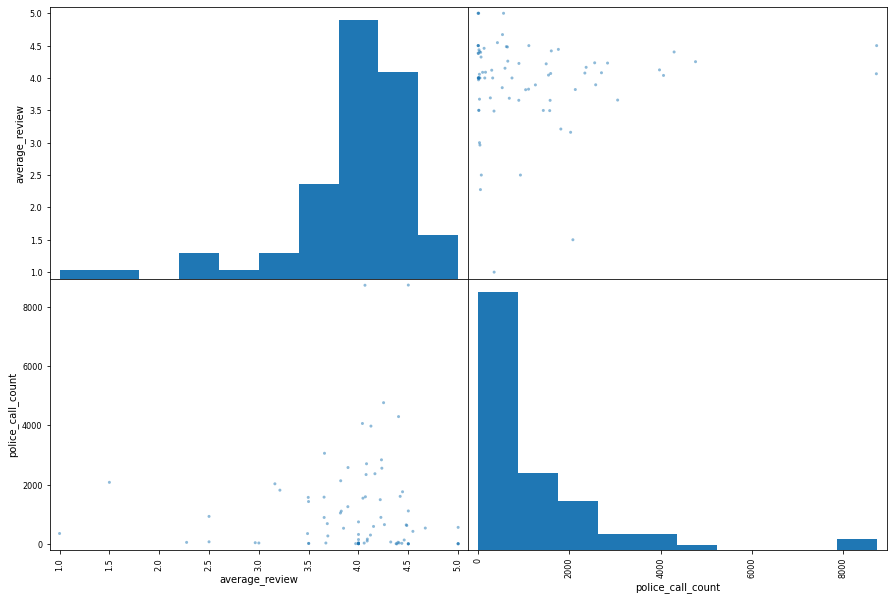

In [22]:
#creates a scatter plot matrix for merged_df
pd.plotting.scatter_matrix(merged_df[['average_review','police_call_count']], 
                           figsize=(15, 10));

Figure 1: Scatterplot matrix of columns in merged_df

It seems that there are outliers for both average_review and police_call_count, let's use boxplot to have a look.

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


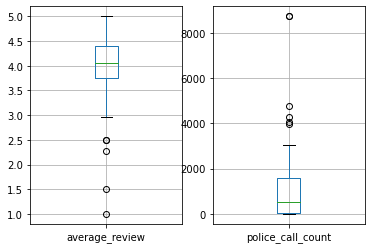

In [23]:
#creates a box plot for colmuns in merged_df
plt.subplot(1, 2, 1)
print(merged_df.boxplot(column=['average_review']))
plt.subplot(1, 2, 2)
print(merged_df.boxplot(column=['police_call_count']))

Figure 2: Boxplot of columns in merged_df

It seems that the average_review below 3 and police_call_count above 3000 were all listed as outliers. Let's have a look at them.

In [24]:
#Print the outliers
print(merged_df[merged_df['average_review'] < 3 ] )
print(merged_df[merged_df['police_call_count'] > 3000 ] )


       average_review  police_call_count
92139        2.500000                929
91977        2.275000                 53
92083        2.963592                 42
92008        2.500000                 72
92020        1.500000               2078
91911        1.000000                353
       average_review  police_call_count
92101        4.065003               8725
92110        4.251682               4764
92109        3.658767               3058
92111        4.124904               3975
92104        4.039493               4063
92102        4.500000               8731
92105        4.401961               4295


- For average review lower than 3, personally I think people don't usually like to give extremely low reviews even if they are not satisfied. So I think it is possible that there are many other factors like if the parks were maintained regularly or if the parks were too noisy or crowded, and etc.<br>
- For police_call_count above 3000, I noticed that these zip zones are all highly urbanized areas that are closed to the downtown of San Diego, so it makes sense that these areas have more police calls since they may have more population and therefore, more incidents. <br><br>
However, these all reveals that there are limitations of this analysis.<br>
But for now, I will just try to make 2 analysis, one with outliers and one without.



AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


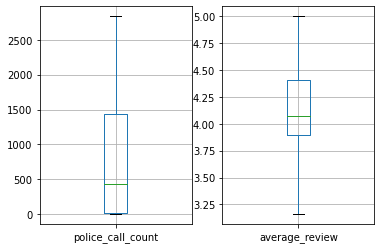

In [25]:
#Remove the outliers, and save them to a new dataframe df
df = merged_df[merged_df['police_call_count'] < 3000 ]
df = df[df['average_review'] > 3 ] 
#Print the boxplot of df
plt.subplot(1, 2, 1)
print(df.boxplot(column=['police_call_count']))
plt.subplot(1, 2, 2)
print(df.boxplot(column=['average_review']))

Figure 2: Boxplot of columns in df (merged_df without outliers)

Now we have a dataframe called df without outliers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'avg_review (with outliers)')

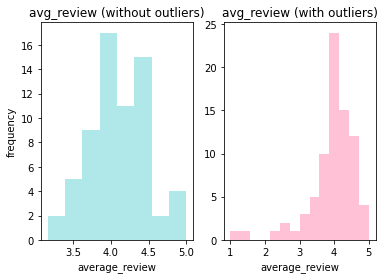

In [26]:
#Print the distribution of average_review colmun, with outliers and without.
plt.subplots_adjust(hspace = 11)
plt.subplot(1, 2, 1)
ax = sns.distplot(df['average_review'], kde=False,color='#3BC4C7')
ax.set_title('avg_review (without outliers)')
ax.set_ylabel('frequency')
plt.subplot(1, 2, 2)
bx = sns.distplot(merged_df['average_review'], kde=False,color='#FF6699')
bx.set_title('avg_review (with outliers)')


Figure 3: Distributions of average_review for dataframe with and without outliers.<br>
With outliers, the distribution is left-skewed.<br>
Without outliers, the distribution looks a little like a normal distribution.

Text(0.5, 1.0, 'police_call(with outliers)')

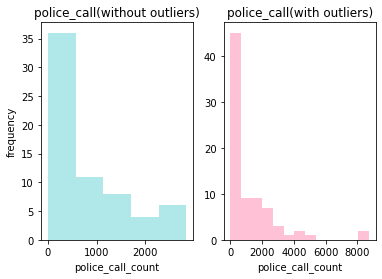

In [27]:
#Print the distribution of police_call_count colmun, with outliers and without.
plt.subplot(1, 2, 1)
ax = sns.distplot(df['police_call_count'], kde=False,color='#3BC4C7')
ax.set_title('police_call(without outliers)')
ax.set_ylabel('frequency')
plt.subplot(1, 2, 2)
bx = sns.distplot(merged_df['police_call_count'], kde=False,color='#FF6699')
bx.set_title('police_call(with outliers)')


Figure 4: Distributions of police_call_count for dataframe with and without outliers.<br>
For both data, the majority of police call count is less than 1000.

## Linear Regression

To identify the relationship between average yelp ratings of and police call count of different zip zone in San Diego, I'm going to be using a linear regression model to find the best fit line.

### Without outliers

In [28]:
#Creat linear regression model without outliers
outcome, predictors = patsy.dmatrices('police_call_count ~ average_review', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      police_call_count   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.407
Date:                Sun, 13 Dec 2020   Prob (F-statistic):             0.0398
Time:                        18:27:31   Log-Likelihood:                -527.88
No. Observations:                  65   AIC:                             1060.
Df Residuals:                      63   BIC:                             1064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2943.9244   1052.162      2.

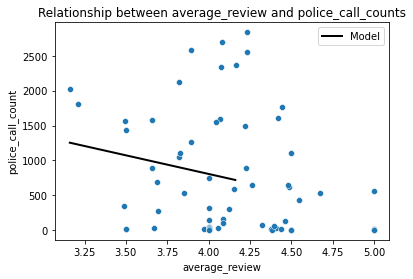

In [29]:
#plot the original data
sns.scatterplot(x='average_review', y='police_call_count', data=df)

#generate model fit line
xs = np.arange(df['average_review'].min(), df['average_review'].max())
ys = -534.7253  * xs + 2943.9244
ax =plt.plot(xs, ys, 'k', linewidth=2, label='Model')

plt.xlabel('average_review')
plt.ylabel('police_call_count')
plt.title('Relationship between average_review and police_call_counts')
plt.legend();

Figure 5: The line generated from the linear regression model suggests there may be a negative correlation between the police call count and average yelp review when the outlies are removed. The lower the police call count, the higher the average yelp rating.However, since R-squared is very small, we don't have strong confidence to conclude this relation.

### With outliers

In [30]:
#Creat linear regression model with outliers
outcome, predictors = patsy.dmatrices('police_call_count ~ average_review', merged_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      police_call_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1400
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.709
Time:                        18:27:32   Log-Likelihood:                -698.38
No. Observations:                  79   AIC:                             1401.
Df Residuals:                      77   BIC:                             1405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        720.9142   1121.943      0.

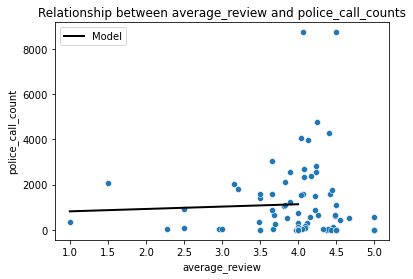

In [31]:
#plot original data
sns.scatterplot(x='average_review', y='police_call_count', data=merged_df)

#generate model fit line
xs = np.arange(merged_df['average_review'].min(), merged_df['average_review'].max())
ys = 104.7442 * xs + 720.9142
ax =plt.plot(xs, ys, 'k', linewidth=2, label='Model')

plt.xlabel('average_review')
plt.ylabel('police_call_count')
plt.title('Relationship between average_review and police_call_counts')
plt.legend();

Figure 5: The line generated from the linear regression model suggests when outliers are not removed, there may be a slight positive correlation between the police call count and average yelp review. The higher the police call count, the lower the average yelp rating.However, its R-squared is extremely small, so we don't have confidence to conclude this relation.

# Ethics & Privacy

The datasets were given to me so I assume that I have permissions to use them for analysis. Also, since they were given to me by academic faculties,I assume that their privacy were carefully checked by professionals before I use them for analysis. Depending on what is avaliable to me, the two data sets I used were avaliable for the pulic to view. The yelp data set is accessible to the public via yelp's website, and the police call data set is acessible to public through San Diego government's website.

However, although the police call data is accessible to the public, one area to be concerned about privacy is the information identifying the people that making those calls. There incident number for each call is avalible in this data set. It is highly possible that these numbers are associated with people's private information like name, IDs, phone numbers, and etc in somewhere of the government's database. It is possible that people have acess to it will break people's privacy using those incident number. But since this information is not useful in this analysis, it was removed. Another potential area for concern would be the privacy or the people who rated the parks on yelp. However, this would not be a problem in our case since all the private information does not exist in our yelp data, so there's no way to identify the users who rated the parks.

Also, there is potential for bias in how the data were collected. For the police call data, I'm not too certain about how the priority of each call was determined, but I assume that they were determined by human beings, who always have their subjective opinions.Also,the values for the priorities in the data set are not entirely consistent with the government's official definition, which results to me making assumptions that priority 1 is corresponding to very urgent incident. But since the official definitions are not consistent with the actual data,it is possible that my assumption is wrong.Another potential bias is that the yelp reviews are not representative of the entire population. Some people may have higher expectations for parks, and some may not. Also, it is likely that some people have opinions on the parks, but didn't post reviews on yelp.People who are more likely to write a review online might bias the yelp dataset. While these biases are unavoidable, it is important to note their potential to influence the data.

One possible unintended consequence of this analysis could be emphasizing negative qualities of an individual park of San Diego. Even though the reviews for each parks and the police call count of each area are avaliable to public, this analysis could potentially build a relationship between crimes and low rating parks in people's subconscious. But this consequence may be unavoidable considering the research questions seeks to understand what is the relationship between them, but still, it is necessary that people who read this analysis understand it.

# Conclusion & Discussion

In this project, I intended to find the relationship between the average yelp ratings and the number of urgent police calls of different zip zones of San Diego. To see if yelp information of parks might be able to provide us information related to the public safety. I firstly extract raw address of each police call using geopy, then extract the zipcode data from the well organized yelp data directly. After that, I calculated the police call frequency of each zip zone and calculated the average yelp reviews of different zip zones. Then, I merged these two information to be able to look at the average yelp scores side to side with the number of police call. Next, I cleanned the data, and then found out that there are outliers in each data. For the yelp data, outliers occurred in low ratings, and for police call data, outliers occurred in highly urbanized areas that are closed to downtown San Diego. Then, I created another dataframe contains no outliers. For both data with and without outliers, I plotted the relationship between average yelp scores and number of urgent police calls and used linear regression to create a best fit line using linear regression to better visualize their correlation. Based on the results, I found there to be a negative correlation between the average yelp scores and the number of police calls when the outliers are cleanned, and a positve correlation between them when outliers were kept. However, the R-suqared for both model is very small, but for the one with outliers, it is much smaller, which indicates that the negative correlation produced by data without outliers may be more trustworthy, which indicates that my hypothesis seems to be correct.

However, there were several limitations to this project. First is that when I transformed the raw address of each police call to zipcode using geopy, many data were lost.Some of them were not successfully transformed into proper zipcode of San Diego. Another limitation is that when I merged the average yelp ratings and the police call count data together, 25% of the orignial average rating data were lost.These lost data have the potential to greatly influence the result of this analysis if they were not lost. Besides, the use of a simple linear regression model may not have been the best approach to analyzing the data. Given more time I would have liked to explore other models that better account for other variables.For example, I noticed that zip zones closed to the downtown have much more police calls than others. This makes sense because they may have more population. Therefore, population could be a confounding variable here. Also, the level of poverty can also influence the num of police calls. It is also a confounding variable, which could be considered in future analysis.Another limitation was that the average yelp ratings may not be the best indication of parks' quality. It is highly possible that some people have opinions on the parks, but didn't post reviews on yelp. What is more, the official description of the police call data is not consistent with the actual data, which means what I have assumed that the prioirty 1 is urgent could be totall opposite. Also,dataset could be using outdated information. Although we know that he police call data is for 2019, but we have no idea about when is the yelp rating data collected. Besides,yelp ratings seem to be accumulated, which means when things have changed, the reviews made years ago would still be there and influence our analysis.Another limitation is that the data only included information in San Diego, so the results could not be applied nationally.

Overall, I think this project may help to provide further insight into the relationship between the quality of parks and safety of different areas. It could help inform state and local parks& recreation and public safety departmen that how data from online park reviews might provide valuable information related to a location's urgent incidents frequency.